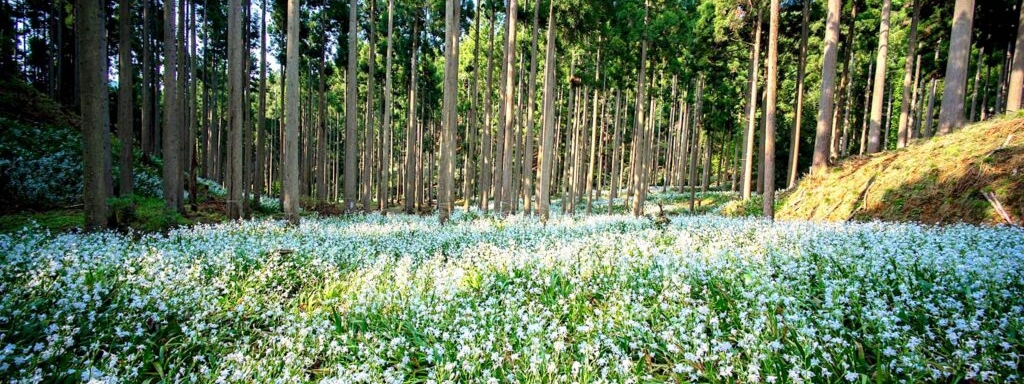

# Infomap for Ashu Forest Pollination Network
---
### Data :Kyoto University Forest of Ashu -  Kato et al. (1990)
http://www.ecologia.ib.usp.br/iwdb/html/kato_1990.html  
The dataset includes a matrix of the interactions, ie which insect pollinations at on each plant.  
This matrix plotted below.

### Analysis
So far https://www.mapequation.org/infomap/ as looks the clearest
Python install looks trival  
Also have infomap eccology from the paper installed but still dont know whats appering under the hood on that one. 

### Notes: 
So far only been able to run on version with in form N poll, N plant, freq but I think this should be the weight also not sure about the


#### Community detection:  
https://towardsdatascience.com/community-detection-algorithms-9bd8951e7dae

The map equation uses Shannon's source coding theorem (Shannon, 1948) to convert the rates encoded in the codebooks to information measured in bits.
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6922315/

#### Modularity analysis
https://en.wikipedia.org/wiki/Modularity_(networks)

### Bipartite
Primary nodes and feature nodes, we can interpret shared feature nodes as indirect relations between primary nodes.

### Questions
* Do we need to do clustering to build a simpler network? 
* How do we get the data in a form that we can conduct modularity analysis?
* Can we simiply the network ie pune all rows and columns below threshold?
* Do we look at a system of just one plant, then up complexity?

### To Do
* Figure out best form of inputting the data 
* Figure out best way of seting up infomap
* How do we know if we have good/bad results what metric
* Plot of the interactions shows most of the space is dark, maybe we should prune away the bad bits
* Add labels to the network plots

### Sheets
* matr: interaction matrix of every interaction between pollentor and plant. 
* pla+pol

In [2]:
import pandas as pd
import os
import re 
import numpy as np

cwd = os.getcwd()
filepath= os.path.join(cwd, 'data','Original_data', 'kato_et_al_1990.xls')
sheets = ['matr','pla+pol','pla','pol']
sheet = sheets[0]
df = pd.read_excel(filepath, sheet_name = sheet, header = [0,1,2])
df

Unnamed: 0_level_0 plant_ge      Acer  \
                               Unnamed: 0_level_1 plant_sp rufinerve   
                                        pol_ge_sp      no.         1   
0                       ACHILIDAE1 (Ach. : Hem. )       53         0   
1    Acteniceromorphus nipponensis (Ela. : Col. )      398         0   
2                 Actina jezoensis (Str. : Dip. )      139         0   
3        Adelphocoris triannulatus (Mir. : Hem. )       28         0   
4                      AGALLIIDAE1 (Aga. : Hem. )       47         0   
..                                            ...      ...       ...   
674                      LUSIIDAE1 (Clu. : Dip. )      675         0   
675          Lasioglossum (El.) aff (Hal. : Hym )      676         0   
676                 Camponotus sp. (For. : Hym. )      677         0   
677                    Andrena sp. (And. : Hym. )      678         0   
678                    Ceratina sp. (Ant. : Hym.)      679         0   

    Adenocaulon  Aesculus Agrimonia  Ainsliaea      Alangium       Ampelopsis  \
     himalaicum turbinata    pilosa acerifolia platanifolium brevipedunculata   
              2         3         4          5             6                7   
0             0         0         0          0             0                0   
1             0         0         0          0             0                0   
2             0         0         0          0             0                0   
3             0         0         0          0             0                0   
4             0         0         0          0             0                0   
..          ...       ...       ...        ...           ...              ...   
674           0         0         0          0             0                0   
675           0         0         0          0             0                0   
676           0         0         0          0             0                0   
677           0         0         0          0             0                0   
678           0         0         0          0             0                0   

     Anemone  ... Tripterospermum Viburnum      Viola                     \
    flaccida  ...       japonicum plicatum grypoceras kusanoana vaginata   
           8  ...              84       85         86        87       88   
0          0  ...               0        0          0         0        0   
1          0  ...               0        0          0         0        0   
2          0  ...               0        0          0         0        0   
3          0  ...               0        0          0         0        0   
4          0  ...               0        0          0         0        0   
..       ...  ...             ...      ...        ...       ...      ...   
674        0  ...               0        0          0         0        0   
675        0  ...               0        0          0         0        0   
676        0  ...               0        0          0         0        0   
677        0  ...               0        0          0         0        0   
678        0  ...               0        0          0         0        0   

                Weigela      Cornus       Caryopteris   
    verecunda hortensis controversa kousa   divaricata  
           89        90          91    92           93  
0           0         0           0     0            0  
1           0         0           0     0            0  
2           0         0           0     0            0  
3           0         0           0     0            0  
4           0         0           0     0            0  
..        ...       ...         ...   ...          ...  
674         0         0           0     0            0  
675         0         0           0     0            0  
676         0         0           0     0            0  
677         0         0           0     0            0  
678         0         0           0     0            0  

[679 rows x 95 columns]

In [3]:
plant_genus   = df.columns.get_level_values(0)[2::]
plant_species = df.columns.get_level_values(1)[2::]
plant_numbers = df.columns.get_level_values(0)[3::]
plant_species

Index(['rufinerve', 'himalaicum', 'turbinata', 'pilosa', 'acerifolia',
       'platanifolium', 'brevipedunculata', 'flaccida', 'polymorpha',
       'pubescens', 'filiforme', 'aemula', 'dioicus', 'glehni', 'thunbergii',
       'japonica', 'kousa', 'tenuicaulis', 'delphiniifolia', 'alternifolia',
       'divaricatum', 'crenata', 'japonicum', 'kagamontanum', 'micranthum',
       'communis', 'lineariloba', 'pallida', 'japonica', 'podocarpum',
       'crenata', 'sessile', 'grandiflorum', 'alatus', 'sieboldianus',
       'nepalense', 'japonicum', 'tomentella', 'hirta', 'macrophylla',
       'paniculata', 'noli-tangere', 'textori', 'dentata', 'yomena', 'bicolor',
       'obtusifolium', 'clethroides', 'salicifolia', 'griffithii', 'villosa',
       'aestiva', 'pubescens', 'senticosa', 'thunbergii', 'japonicus',
       'amurense', 'asiatica', 'macranthum', 'Grayana', 'incisa', 'salicina',
       'longituba', 'trichocarpa', 'japonica', 'javanica', 'trichocarpa',
       'multiflora', 'illecebrosus

In [4]:
df.columns = ['pollenators', 'no.']+list(plant_species)
poll_num = df['no.'] 
df=df.drop(columns='no.')

In [5]:
df['pollenators']=df['pollenators'].apply(lambda x: re.sub(r'\([^)]*\)|\[[^]]*\]', '', x))
poll_species = df['pollenators']
df=df.set_index('pollenators')
df

,rufinerve,himalaicum,turbinata,pilosa,acerifolia,platanifolium,brevipedunculata,flaccida,polymorpha,pubescens,...,japonicum,plicatum,grypoceras,kusanoana,vaginata,verecunda,hortensis,controversa,kousa,divaricata
pollenators,,,,,,,,,,,,,,,,,,,,,
ACHILIDAE1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acteniceromorphus nipponensis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Actina jezoensis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adelphocoris triannulatus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AGALLIIDAE1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LUSIIDAE1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Lasioglossum aff,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Camponotus sp.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/home/jake/anaconda3/envs/msim/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


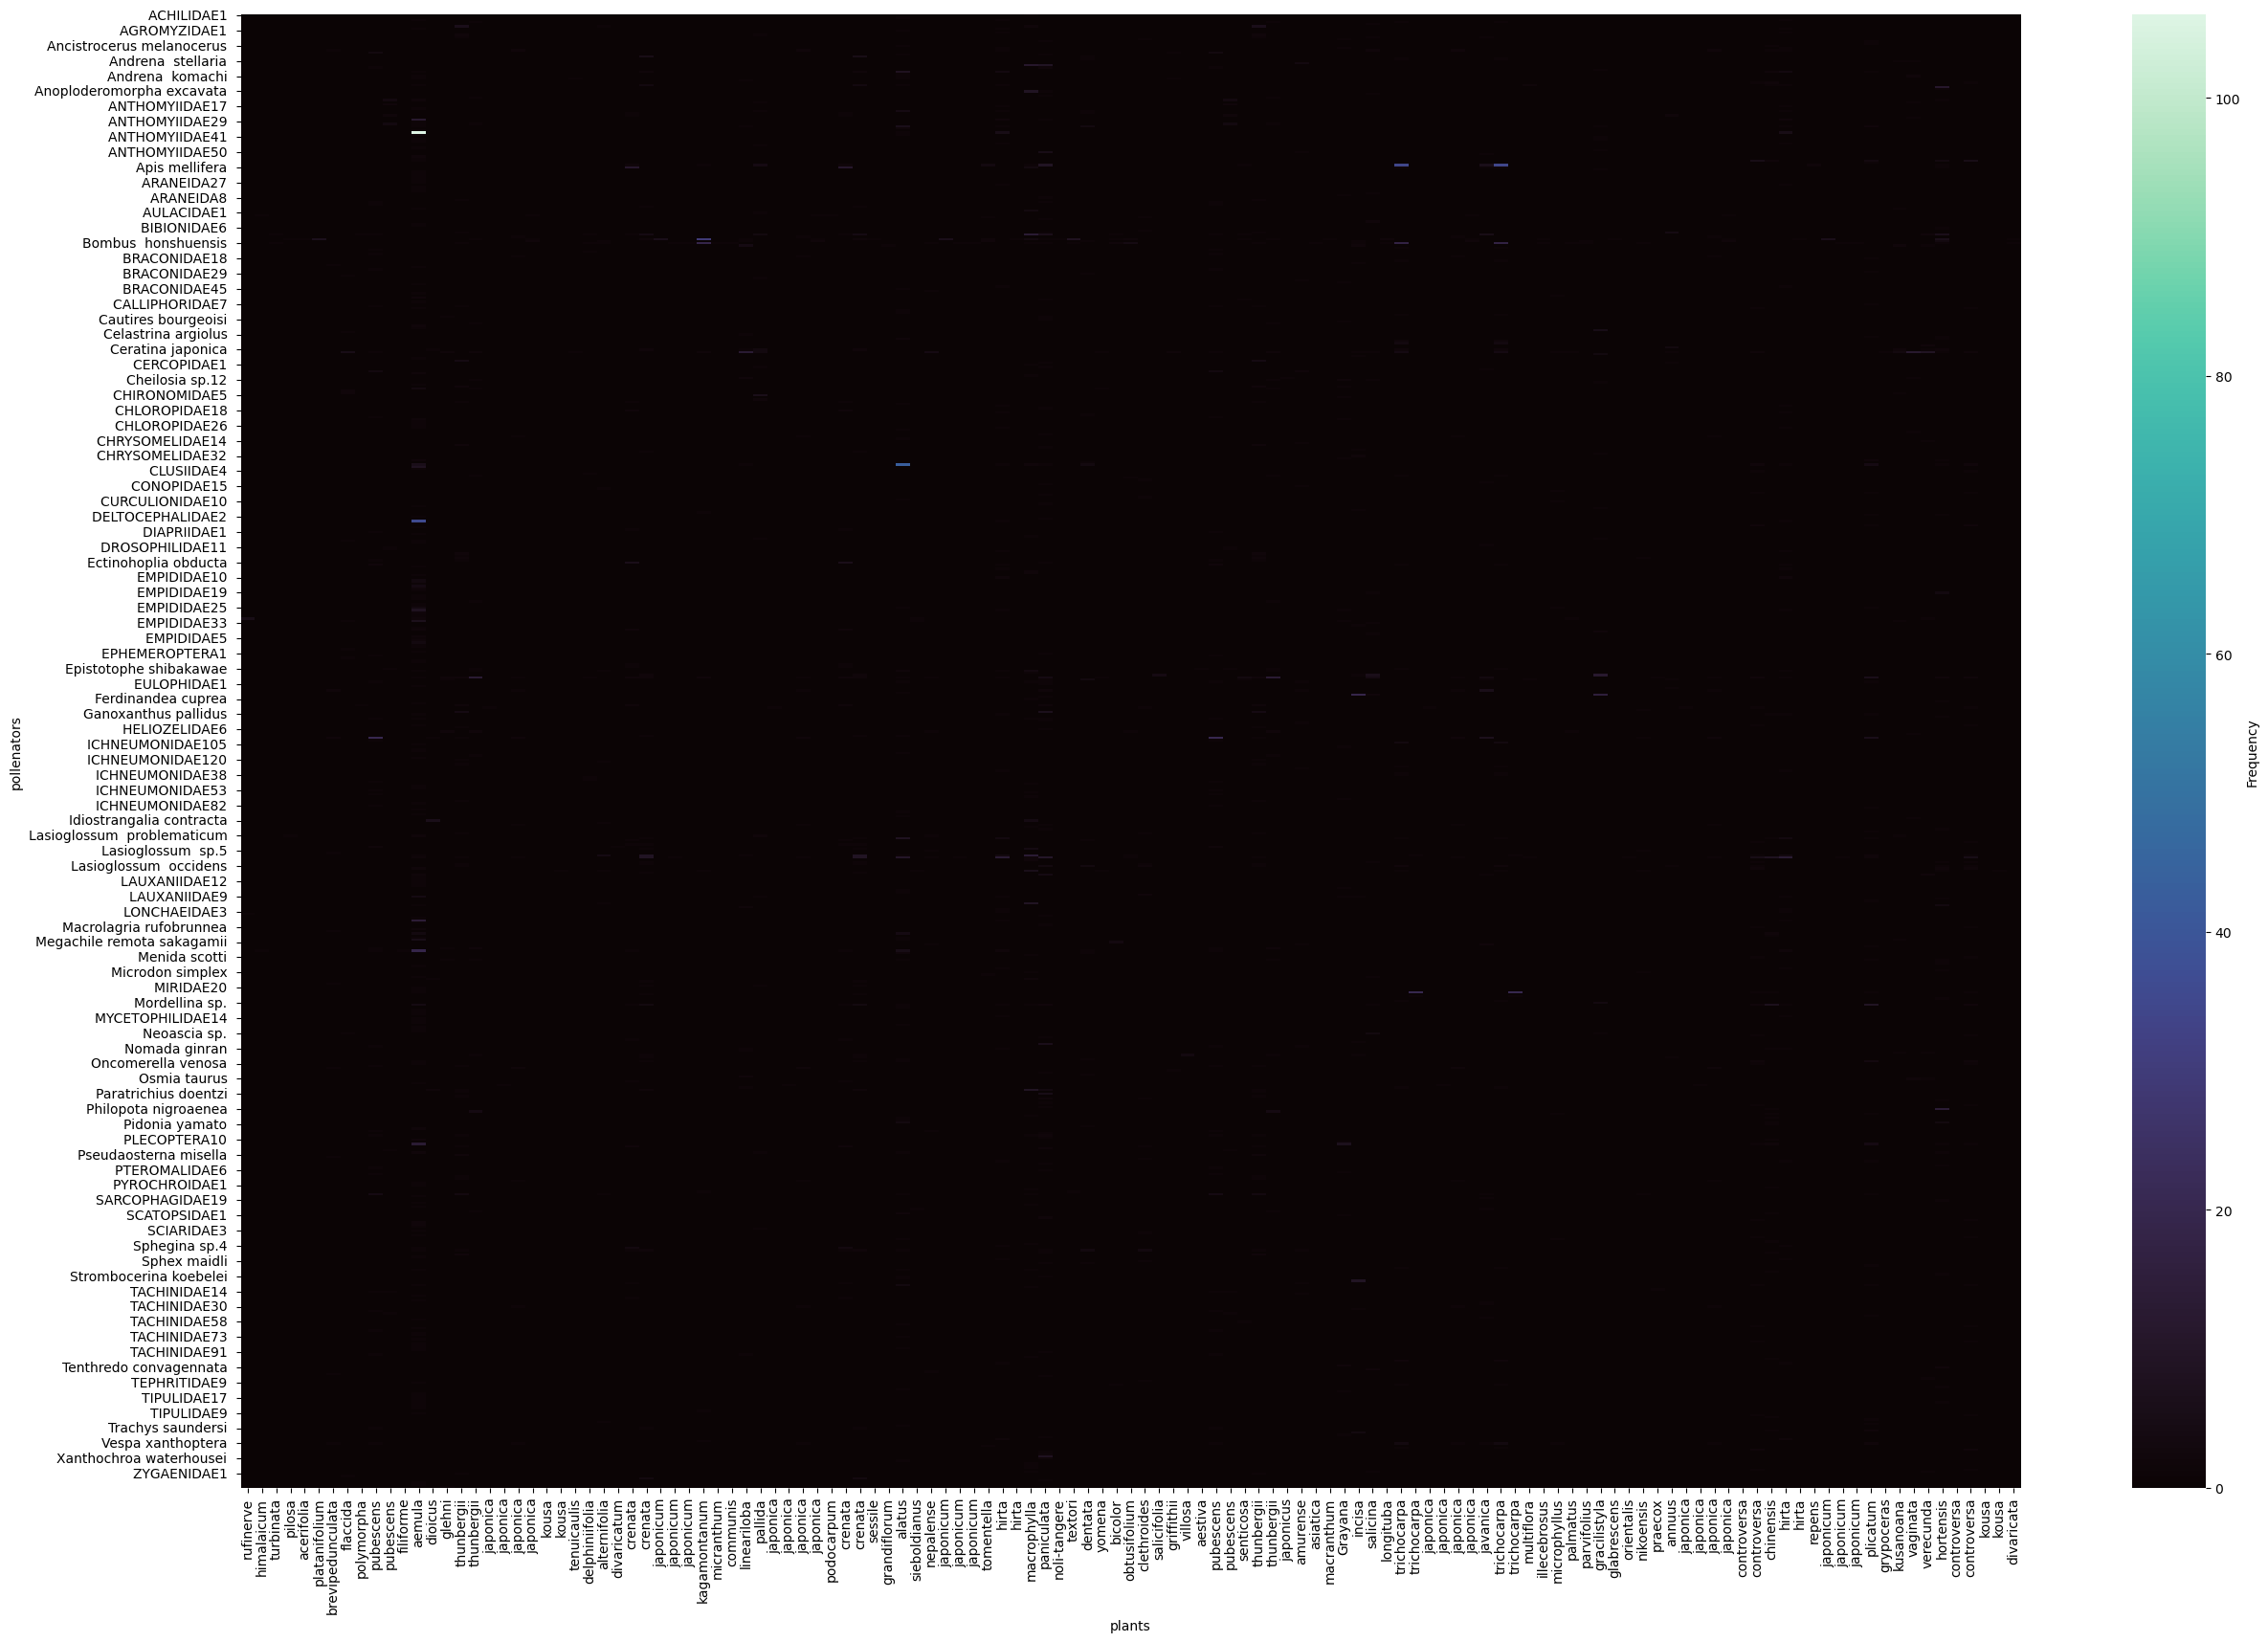

In [5]:
import seaborn as sn
import matplotlib.pyplot as plt 
plt.figure(figsize = (30,20))
plt.xlabel('plant')
heatmap=sn.heatmap(df[plant_species], 
                   cmap=sn.color_palette("mako", as_cmap=True),
                   cbar_kws={'label': 'Frequency'})

heatmap.set(xlabel='plants')              
plt.savefig('images/all_Data_heatmap_lb',bbox_inches='tight')

In [6]:
df.sum()

rufinerve       6
himalaicum      2
turbinata       2
pilosa          2
acerifolia      1
               ..
verecunda      23
hortensis      92
controversa    50
kousa           1
divaricata      2
Length: 93, dtype: int64

In [7]:
df.sum().sum()

2392

In [8]:
poll_species = np.char.replace(poll_species.to_numpy(dtype=str), ' ', '_')#pandas->np->elements->string->replace space

Here we are fetching the data from the interaction matrix and putting it back into a format that infomap can run on.  

Changes: I think the threshold requiring greater or equal makes more sense

# simple data 

Cols is just the number of pollenators, in this case 93. Since both pollenators and the plants indexs start from zero. To make each index unique, we shift the pollenator indexs to start after the plant indexs (adding 1000 to make them visually distinct). 

In [9]:
threshold_freq = 5
start_pol = 1000 


f = open("data/monopartite,"+"freq_thr_"+str(threshold_freq), "w")
array=df.to_numpy()
rows, cols = array.shape

for row in range(rows):
    for col in range(len(array[row])):
        if array[row][col]>=threshold_freq:
            f.write(str(start_pol+poll_num[row])+' '+ str(col)+ ' '+ str(array[row][col]) +'\n')
f.close()

In [10]:
array=df.to_numpy()
array.shape

(679, 93)

## Bipartite
Does not work on low threshold ie 1 and 2

In [11]:
array=df.to_numpy()
rows, cols = array.shape
start_pol =1000
threshold_freqs = range(0,16)
for thres in threshold_freqs: 
    threshold_freq = thres
    # maybe add pertibations

    f = open("data/Monopartite/"+"freq_thr_"+str(threshold_freq), "w") #Data with the text label
    f_bi = open("data/Bipartite/"+"freq_thr_"+str(threshold_freq), "w")
    nodes, features  = {}, {}, # trying the bipartite format
    network = ''
    feature_num= 0
    for row in range(rows):
        for col in range(len(array[row])):
            if array[row][col]>=threshold_freq:
                pol_num = start_pol+poll_num[row] #making the numbers unique 
                nodes[str(pol_num)] =  poll_species[row]
                if plant_species[col] not in features.keys():
                    features[plant_species[col]] = feature_num 
                    feature_num+=1

                interaction = str(pol_num)+' '+ str(features[plant_species[col]])+ ' '+ str(array[row][col]) +'\n'
                network += interaction
                f.write(interaction)

    f.write(interaction)
    f.close()
    f_bi.write('#N nodes = '+str(len(nodes)) + ', N features = '+str(len(features))+'\n')
    f_bi.write('\n*Vertices '+str(len(nodes)+len(features))+'\n')
    for key in nodes:
        f_bi.write(key+' "'+ nodes[key]+'" \n')
    features_swap = {v: k for k, v in features.items()}# ugly swap of keys and features but done as it
    #gives output in the correct order ie feature num 1 2,3,4, ect
    for key in features_swap:
        f_bi.write(str(key)+' "'+ features_swap[key]+'" \n')

    f_bi.write('\n*Bipartite '+str(len(nodes))+'\n')
    f_bi.write(network)
    f_bi.close()

#### Copy to clipboard (for website)
```Bash
xclip -sel c < ~/info_theory/Information_Theory/data_text.txt
```

## Running Infomap on Python
https://mapequation.github.io/infomap/python/

can run but i have no idea how to save the output
Command line flags can be added as a string to Infomap

In [11]:
from infomap import Infomap
#im=Infomap(out_name=os.path.join('data','output.tree'), no_file_output=False)
#im=Infomap('--tree --out_name ' + os.path.join('data','output.tree'))

im=Infomap('-o tree --')
im.readInputData('data/data_num.txt')
im.run()

#im.writeMap("data/file.tree")

. Found 3 levels with codelength 2.958645578

=> Trial 1/1 finished in 0.003186744s with codelength 2.95864558


Summary after 1 trial
Best end modular solution in 3 levels:
Per level number of modules:         [         18,           2,           0] (sum: 20)
Per level number of leaf nodes:      [          0,          74,           8] (sum: 82)
Per level average child degree:      [         18,     4.22222,           4] (average: 6.63617)
Per level codelength for modules:    [0.374674428, 0.064296041, 0.000000000] (sum: 0.438970469)
Per level codelength for leaf nodes: [0.000000000, 2.168715028, 0.350960081] (sum: 2.519675109)
Per level codelength total:          [0.374674428, 2.233011069, 0.350960081] (sum: 2.958645578)

  Infomap ends at 2023-07-26 10:52:56
  (Elapsed time: 0.01356251s)
Parsing undirected network from file 'data/data_num.txt'...
  Parsing links...
  -> 80 links
Done!
-------------------------------------
  -> 82 nodes
  -> 80 links with total weight 922
  Infomap v2

In [16]:
!infomap --help

Name:
        Infomap - Implementation of the Infomap clustering algorithm based on the Map Equation (see www.mapequation.org)

Usage:
        Infomap network_file out_directory [options]

[network_file]
    File containing the network data. Assumes a link list format if no Pajek formatted heading.

[out_directory]
    Directory to write the results to.

[options]

About
-----
  -h[+] --help [+]                                     Prints this help message. Use -hh to show advanced options.
  -V    --version                                      Display program version information.
        --print-json-parameters                        Print Infomap parameters in JSON.

Input
-----
  -c<p> --cluster-data <path>                          Provide an initial two-level (clu format) or multi-layer (tree format) solution.
        --no-infomap                                   Don't run the optimizer. Useful to calculate codelength of provided cluster data or to print non-modular statistics.

Al

In [3]:
im.get_dataframe()

,path,flow,name,node_id
0,"(1, 1)",0.126898,11,11
1,"(1, 2)",0.060195,415,415
2,"(1, 3)",0.019523,143,143
3,"(1, 4)",0.013015,312,312
4,"(1, 5)",0.010846,507,507
...,...,...,...,...
77,"(16, 2)",0.003254,226,226
78,"(17, 1)",0.003254,12,12
79,"(17, 2)",0.003254,548,548
80,"(18, 1)",0.002711,0,0


### Pruning

In [131]:
threshold = 3
N_col_del = 0
for col in df.columns:
    col_total = df[col].sum().sum()
    if col_total < threshold:
        print(col, col_total)
        N_col_del+=1

himalaicum 2
turbinata 2
pilosa 2
acerifolia 1
polymorpha 2
filiforme 1
kousa 1
tenuicaulis 2
divaricatum 1
micranthum 1
communis 1
podocarpum 1
sessile 1
grandiflorum 1
noli-tangere 1
aestiva 1
japonicus 1
asiatica 1
macranthum 1
illecebrosus 2
parvifolius 2
glabrescens 1
orientalis 1
praecox 2
repens 2
grypoceras 1
kousa 1
divaricata 2


In [132]:
N_row_del=0
rows_t_del = []
for row in range(rows):
    row_vals = array[row]
    row_total = row_vals.sum()
    if row_total<threshold:
        print(poll_species[row], row_total)
        N_row_del+=1

ACHILIDAE1_(Ach._:_Hem._) 1
Acteniceromorphus_nipponensis_(Ela._:_Col._) 1
Actina_jezoensis_(Str._:_Dip._) 2
Adelphocoris_triannulatus_(Mir._:_Hem._) 2
AGALLIIDAE1_(Aga._:_Hem._) 1
Aglaostigma_neburosa_(Ten._:_Hym._) 2
AGROMYZIDAE1_(Agr._:_Dip._) 1
AGROMYZIDAE5_(Agr._:_Dip._) 1
Ammophila_infesta_(Sph._:_Hym._) 2
Anaglyptus_niponensis_(Cer._:_Col._) 2
Anaspis_funagata_(Scr._:_Col._) 1
Ancistrocerus_melanocerus_(Ves._:_Hym._) 2
Andrena_(Andrena)_benefica_(And._:_Hym._) 2
Andrena_(Andrena)_longitibialis_(And._:_Hym._) 2
Andrena_(Chlorandrena)_Knuthi_(And._:_Hym._) 2
Andrena_(Euandrena)_stellaria_(And._:_Hym._) 2
Andrena_(Hoplandrena)_miyamotoi_(And._:_Hym._) 1
Andrena_(Micrandrena)_kaguya_(And._:_Hym._) 1
Andrena_(Micrandrena)_sublevigata_(And._:_Hym._) 1
Andrena_(Trachandrena)_haemorrhoa_japonibia_(And._:_Hym._) 1
Anostinus_daimio_(Ela._:_Col._) 1
Antherophagus_nigricornis_(Cry._:_Col._) 1
ANTHOCORIDAE2_(Ant._:_Hem._) 1
ANTHOMYIIDAE14_(Ant._:_Dip._) 2
ANTHOMYIIDAE16_(Ant._:_Dip._) 2
ANTH

In [133]:
print('A threshold of', threshold, 'would remove', N_col_del, 'cols and ', N_row_del, 'rows')

A threshold of 3 would remove 28 cols and  532 rows


In [16]:
#shorten the names
'ACHILIDAE1_(Ach._:_Hem._) 1'.split('(',1)[0]

'ACHILIDAE1_'

In [17]:
import re 
name = 'Andrena_(Andrena)_longitibialis_(And._:_Hym._)'
result = re.sub(r'\([^)]*\)|\[[^]]*\]', '', name) #Regex to remove any content in brackets
print(result)

Andrena__longitibialis_
